In [1]:
import pandas as pd
import numpy as np
import datetime
import csv

In [2]:
train_df=pd.read_csv("C:\\Users\\User\\Desktop\\newyork_train.csv")

In [3]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
print("Total samples:", len(train_df))

Total samples: 1048575


In [5]:
print(train_df.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64


In [6]:
median_pickup_long=train_df['pickup_longitude'].median(skipna=True)
print(median_pickup_long)
median_pickup_lati=train_df['pickup_latitude'].median(skipna=True)
print(median_pickup_lati)
median_dropoff_long = train_df['dropoff_longitude'].median(skipna=True)
print (median_dropoff_long)
median_dropoff_lati = train_df['dropoff_latitude'].median(skipna=True)
print (median_dropoff_lati)

-73.981803
40.752672
-73.980135
40.753177


In [7]:
train_df=train_df.replace({'pickup_longitude': {0: median_pickup_long}})
train_df=train_df.replace({'pickup_latitude': {0: median_pickup_lati}})
train_df=train_df.replace({'dropoff_longitude': {0: median_dropoff_long}}) 
train_df=train_df.replace({'dropoff_latitude': {0: median_dropoff_lati}}) 
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:
print(train_df.iloc[78580:78590, 0:8])

           key  fare_amount          pickup_datetime  pickup_longitude  \
78580  06:16.0          9.3  2009-11-30 00:06:16 UTC        -73.978010   
78581  44:00.0         11.7  2010-03-22 17:44:00 UTC        -73.980802   
78582  37:49.0          6.5  2015-05-01 08:37:49 UTC        -73.975906   
78583  53:00.0         13.7  2012-05-19 17:53:00 UTC        -73.961253   
78584  20:09.0         14.0  2015-06-30 14:20:09 UTC        -73.973419   
78585  34:20.0          7.3  2009-03-15 12:34:20 UTC        -73.992884   
78586  07:27.0          5.0  2014-12-24 09:07:27 UTC        -73.951539   
78587  08:00.0          9.7  2011-08-15 10:08:00 UTC        -73.981803   
78588  27:34.0          9.0  2014-09-21 18:27:34 UTC        -73.999980   
78589  10:00.0          7.5  2014-10-16 19:10:00 UTC        -73.965897   

       pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
78580        40.742091         -73.968629         40.767133                1  
78581        40.765925     

In [81]:
"""def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(train_df)"""

"def add_travel_vector_features(df):\n    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()\n    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()\n\nadd_travel_vector_features(train_df)"

In [9]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


geocoding is finding latitude and longtitude from city while geodecoding is finding city from long and lat.


In [10]:
from pygeocoder import Geocoder

In [11]:
import math 

In [12]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
    diff=((df.abs_diff_longitude**2)+(df.abs_diff_latitude**2))
    df['distance']=np.sqrt(diff)
add_travel_vector_features(train_df)

In [13]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,distance
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,0.009436
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,0.079696
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,0.013674
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,0.025340
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,0.019470


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

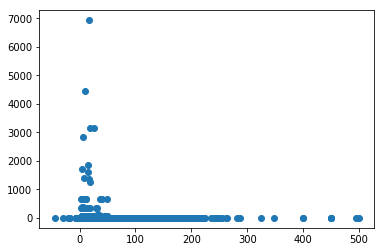

In [16]:
plt.scatter(train_df.fare_amount,train_df.distance)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


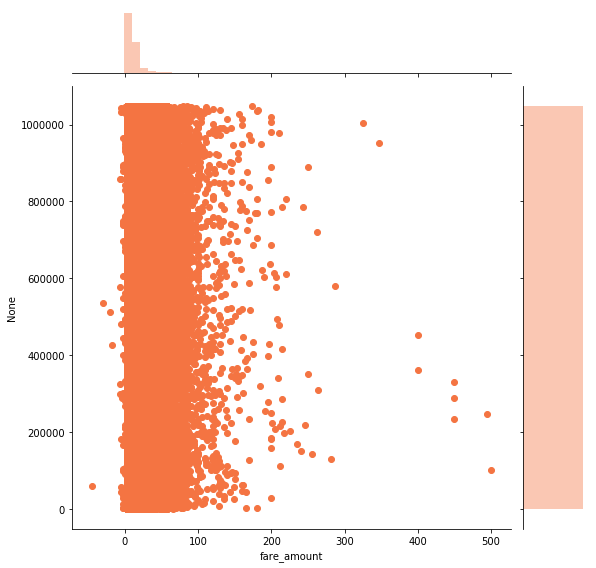

In [17]:
sns.jointplot(x = train_df.fare_amount, y = train_df.index, data= train_df,height=8, ratio=6, color="#f47442")

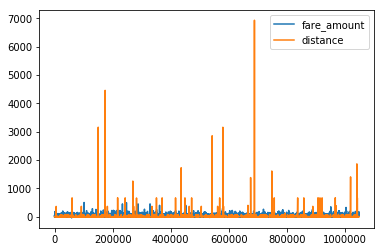

In [18]:
train_df[['fare_amount','distance']].plot()

In [19]:
# this function will also be used with the test set below
def select_within_boundingbox(df, bb):
    return (df.pickup_longitude >= bb[0]) & (df.pickup_longitude <= bb[1]) & \
           (df.pickup_latitude >= bb[2]) & (df.pickup_latitude <= bb[3]) & \
           (df.dropoff_longitude >= bb[0]) & (df.dropoff_longitude <= bb[1]) & \
           (df.dropoff_latitude >= bb[2]) & (df.dropoff_latitude <= bb[3])
            
# load image of NYC map
bb = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoom in on NYC
bb_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [20]:
# this function will be used more often to plot data on the NYC map
def plot_on_map(df, bb, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((bb[0], bb[1]))
    axs[0].set_ylim((bb[2], bb[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=bb)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((bb[0], bb[1]))
    axs[1].set_ylim((bb[2], bb[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=bb)

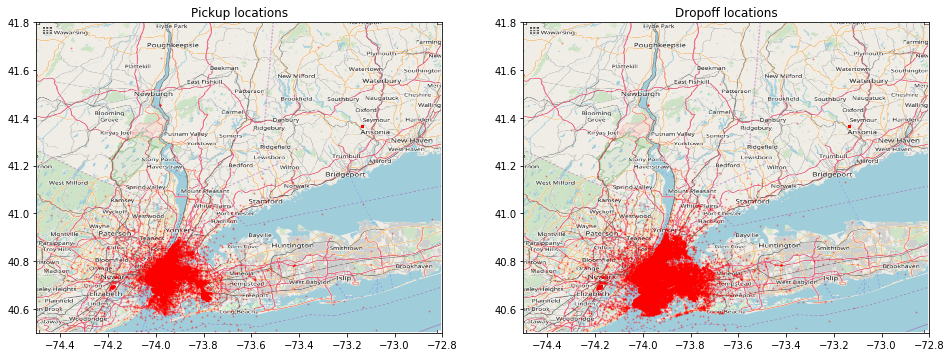

In [21]:
plot_on_map(train_df, bb, nyc_map, s=1, alpha=0.3)

In [13]:
num_split = math.sqrt(len(train_df))

In [14]:
print(num_split)

1023.9995117186336


In [15]:
test_df=pd.read_csv("D:\\newyork traffic fare\\test.csv")

In [16]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [17]:
median_pickup_lon=test_df['pickup_longitude'].median(skipna=True)
print(median_pickup_long)
median_pickup_lat=test_df['pickup_latitude'].median(skipna=True)
print(median_pickup_lati)
median_dropoff_lon = test_df['dropoff_longitude'].median(skipna=True)
print (median_dropoff_long)
median_dropoff_lat = test_df['dropoff_latitude'].median(skipna=True)
print (median_dropoff_lati)

-73.981803
40.752672
-73.980135
40.753177


In [18]:
test_df=test_df.replace({'pickup_longitude': {0: median_pickup_lon}})
test_df=test_df.replace({'pickup_latitude': {0: median_pickup_lat}})
test_df=test_df.replace({'dropoff_longitude': {0: median_dropoff_lon}}) 
test_df=test_df.replace({'dropoff_latitude': {0: median_dropoff_lat}}) 
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [19]:
print(test_df.iloc[1580:1590, 0:7])

                              key          pickup_datetime  pickup_longitude  \
1580  2014-10-11 15:11:24.0000006  2014-10-11 15:11:24 UTC        -73.788427   
1581  2014-10-11 15:11:24.0000001  2014-10-11 15:11:24 UTC        -73.999235   
1582  2009-08-17 12:27:08.0000004  2009-08-17 12:27:08 UTC        -73.960836   
1583  2009-08-17 12:27:08.0000001  2009-08-17 12:27:08 UTC        -73.956207   
1584  2009-08-17 12:27:08.0000003  2009-08-17 12:27:08 UTC        -74.005438   
1585  2011-10-28 07:45:04.0000001  2011-10-28 07:45:04 UTC        -73.961825   
1586  2011-10-28 07:45:04.0000003  2011-10-28 07:45:04 UTC        -73.965400   
1587  2011-10-28 07:45:04.0000002  2011-10-28 07:45:04 UTC        -73.962334   
1588  2014-04-09 09:23:12.0000003  2014-04-09 09:23:12 UTC        -73.981387   
1589  2014-04-09 09:23:12.0000005  2014-04-09 09:23:12 UTC        -73.976461   

      pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
1580        40.641907         -73.864451 

In [81]:
"""from datetime import timezone
dt=datetime.datetime(test_df['pickup_datetime'])
timestamp=dt.replace(tzinfo=timezone.utc).timestamp()
print(timestamp)"""

"from datetime import timezone\ndt=datetime.datetime(test_df['pickup_datetime'])\ntimestamp=dt.replace(tzinfo=timezone.utc).timestamp()\nprint(timestamp)"

In [21]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])
train_df['hour_of_day'] = train_df.pickup_datetime.dt.hour
train_df['day'] = train_df.pickup_datetime.dt.day
train_df['week'] = train_df.pickup_datetime.dt.week
train_df['month'] = train_df.pickup_datetime.dt.month
train_df['day_of_year'] = train_df.pickup_datetime.dt.dayofyear
train_df['week_of_year'] = train_df.pickup_datetime.dt.weekofyear
    

In [23]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,distance,hour_of_day,day,week,month,day_of_year,week_of_year
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,0.009436,17,15,25,6,166,25
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,0.079696,16,5,1,1,5,1
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,0.013674,0,18,33,8,230,33
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,0.025340,4,21,16,4,112,16
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,0.019470,7,9,10,3,68,10


In [24]:
#train_df.drop(['pickup_datetime'], axis = 1, inplace = True)
#train_df.drop(['key'], axis = 1, inplace = True)
train_df=train_df.drop(train_df.columns[2],axis=1)
train_df=train_df.drop(train_df.columns[0],axis=1)
#del train_df['keys']

In [25]:
train_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,distance,hour_of_day,day,week,month,day_of_year,week_of_year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,0.009436,17,15,25,6,166,25
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,0.079696,16,5,1,1,5,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,0.013674,0,18,33,8,230,33
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,0.025340,4,21,16,4,112,16
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,0.019470,7,9,10,3,68,10


In [26]:
train_df.dtypes

fare_amount           float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count         int64
abs_diff_longitude    float64
abs_diff_latitude     float64
distance              float64
hour_of_day             int64
day                     int64
week                    int64
month                   int64
day_of_year             int64
week_of_year            int64
dtype: object

In [27]:
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'])
test_df['hour_of_day'] = test_df.pickup_datetime.dt.hour
test_df['day'] = test_df.pickup_datetime.dt.day
test_df['week'] = test_df.pickup_datetime.dt.week
test_df['month'] = test_df.pickup_datetime.dt.month
test_df['day_of_year'] = test_df.pickup_datetime.dt.dayofyear
test_df['week_of_year'] = test_df.pickup_datetime.dt.weekofyear

In [28]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day,week,month,day_of_year,week_of_year
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,13,27,5,1,27,5
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,13,27,5,1,27,5
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,11,8,40,10,281,40
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,21,1,48,12,336,48
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,21,1,48,12,336,48


In [29]:
test_df=test_df.drop(test_df.columns[1],axis=1)
#test_df=test_df.drop(test_df.columns[0],axis=1)

In [30]:
test_df.head()

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day,week,month,day_of_year,week_of_year
0,2015-01-27 13:08:24.0000002,-73.973320,40.763805,-73.981430,40.743835,1,13,27,5,1,27,5
1,2015-01-27 13:08:24.0000003,-73.986862,40.719383,-73.998886,40.739201,1,13,27,5,1,27,5
2,2011-10-08 11:53:44.0000002,-73.982524,40.751260,-73.979654,40.746139,1,11,8,40,10,281,40
3,2012-12-01 21:12:12.0000002,-73.981160,40.767807,-73.990448,40.751635,1,21,1,48,12,336,48
4,2012-12-01 21:12:12.0000003,-73.966046,40.789775,-73.988565,40.744427,1,21,1,48,12,336,48


In [83]:
#train_df['pickup_datetime'] = train_df['pickup_datetime'].dt.tz_convert('America/New_York')
#train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'], errors='coerce')

In [84]:
#train_df.head()

In [125]:
#train_df.drop(['pickup_datetime'], axis = 1, inplace = True)

In [85]:
#test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'], errors='coerce')
#test_df.head()

In [87]:
#train_df.dtypes

In [59]:
#test_df['pickup_datetime'] =[c for c in test_df['pickup_datetime']  if c not in ["test",'pickup_datetime ']]

In [88]:
#test_df.head()

In [33]:
#from numpy.core.umath_tests import inner1d
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
fare_amount           1048575 non-null float64
pickup_longitude      1048575 non-null float64
pickup_latitude       1048575 non-null float64
dropoff_longitude     1048565 non-null float64
dropoff_latitude      1048565 non-null float64
passenger_count       1048575 non-null int64
abs_diff_longitude    1048565 non-null float64
abs_diff_latitude     1048565 non-null float64
distance              1048565 non-null float64
hour_of_day           1048575 non-null int64
day                   1048575 non-null int64
week                  1048575 non-null int64
month                 1048575 non-null int64
day_of_year           1048575 non-null int64
week_of_year          1048575 non-null int64
dtypes: float64(8), int64(7)
memory usage: 120.0 MB


In [32]:
np.isfinite(train_df.all())

fare_amount           True
pickup_longitude      True
pickup_latitude       True
dropoff_longitude     True
dropoff_latitude      True
passenger_count       True
abs_diff_longitude    True
abs_diff_latitude     True
distance              True
hour_of_day           True
day                   True
week                  True
month                 True
day_of_year           True
week_of_year          True
dtype: bool

In [115]:
#train_df.notna()

In [33]:
train_df.dtypes

fare_amount           float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count         int64
abs_diff_longitude    float64
abs_diff_latitude     float64
distance              float64
hour_of_day             int64
day                     int64
week                    int64
month                   int64
day_of_year             int64
week_of_year            int64
dtype: object

In [34]:
train_df['passenger_count'] = train_df['passenger_count'].values.astype(np.float64)
train_df['hour_of_day'] = train_df['hour_of_day'].values.astype(np.float64)
train_df['day'] = train_df['day'].values.astype(np.float64)
train_df['week'] = train_df['week'].values.astype(np.float64)
train_df['month'] = train_df['month'].values.astype(np.float64)
train_df['day_of_year'] = train_df['day_of_year'].values.astype(np.float64)
train_df['week_of_year'] = train_df['week_of_year'].values.astype(np.float64)


In [35]:
train_df.dtypes

fare_amount           float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count       float64
abs_diff_longitude    float64
abs_diff_latitude     float64
distance              float64
hour_of_day           float64
day                   float64
week                  float64
month                 float64
day_of_year           float64
week_of_year          float64
dtype: object

In [36]:
train_df=train_df.interpolate()

In [37]:
print(train_df.isnull().sum())

fare_amount           0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
abs_diff_longitude    0
abs_diff_latitude     0
distance              0
hour_of_day           0
day                   0
week                  0
month                 0
day_of_year           0
week_of_year          0
dtype: int64


In [38]:
train_df.isnull().sum().sum()

0

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
fare_amount           1048575 non-null float64
pickup_longitude      1048575 non-null float64
pickup_latitude       1048575 non-null float64
dropoff_longitude     1048575 non-null float64
dropoff_latitude      1048575 non-null float64
passenger_count       1048575 non-null float64
abs_diff_longitude    1048575 non-null float64
abs_diff_latitude     1048575 non-null float64
distance              1048575 non-null float64
hour_of_day           1048575 non-null float64
day                   1048575 non-null float64
week                  1048575 non-null float64
month                 1048575 non-null float64
day_of_year           1048575 non-null float64
week_of_year          1048575 non-null float64
dtypes: float64(15)
memory usage: 120.0 MB


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df,train_df['fare_amount'],test_size=0.33, random_state=42)

In [41]:
print(X_train.shape)
print(X_test.shape)

(702545, 15)
(346030, 15)


In [42]:
print(y_train.shape)
print(y_test.shape)

(702545,)
(346030,)


In [43]:
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsRegressor

# instantiate learning model (k = 3)
knn = KNeighborsRegressor(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [44]:
pred = knn.predict(X_test)

In [45]:
from sklearn.metrics import r2_score
a=r2_score(y_test,pred)
print(a)
print(a*100)

0.998029102219035
99.8029102219035


In [55]:
from sklearn.neighbors import KDTree, NearestNeighbors


In [74]:
a={"pickup_longitude":-73.844311,"pickup_latitude":40.721319,"dropoff_longitude":-73.841610,"dropoff_latitude":40.712278,"passenger_count":1,"hour_of_day":17,"day":15,"week":25,"month":6,"day_of_year":166,"week_of_year":25}

In [75]:
pd.Series(a).to_frame()

,0
pickup_longitude,-73.844311
pickup_latitude,40.721319
dropoff_longitude,-73.841610
dropoff_latitude,40.712278
passenger_count,1.000000
hour_of_day,17.000000
day,15.000000
week,25.000000
month,6.000000
day_of_year,166.000000


In [76]:
b_df=pd.DataFrame(a, index=['0',])
print(b_df)

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319          -73.84161         40.712278   

   passenger_count  hour_of_day  day  week  month  day_of_year  week_of_year  
0                1           17   15    25      6          166            25  


In [77]:
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour_of_day', 'day', 'week', 'month', 'day_of_year', 'week_of_year']

In [78]:
features_mean, features_std = train_df[features].describe().loc[['mean', 'std']].values

In [80]:
X_test = (b_df[features].values - features_mean) / features_std

In [81]:
test_neighbors = [[] for _ in range(len(b_df))]

In [82]:
K=1

In [83]:
X_train = (train_df[features].values - features_mean) / features_std
    
kd = KDTree(X_train, leaf_size=50)
    
D, I = kd.query(X_test, k=K)
Y = train_df['fare_amount'].values[I]

for i in range(len(test_neighbors)):
    test_neighbors[i] += list(zip(D[i], Y[i]))
    test_neighbors[i] = sorted(test_neighbors[i], key=lambda x: x[0])[:K]

ValueError: Expected 2D array, got 1D array instead:
array=[-73.844311  40.721319 -73.84161   40.712278   1.        13.
  27.         5.         1.        27.         5.      ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [84]:
df_sub = pd.DataFrame({
    'key': b_df.index,
    'fare_amount': np.array([[x[1] for x in neighbors] for neighbors in test_neighbors]).mean(axis=1)
}).set_index('key')


In [85]:
df_sub.head()


,fare_amount
key,
0,4.5


In [86]:
X_test = (test_df[features].values - features_mean) / features_std

In [87]:
test_neighbors = [[] for _ in range(len(test_df))]

In [88]:
X_train = (train_df[features].values - features_mean) / features_std
    
kd = KDTree(X_train, leaf_size=50)
    
D, I = kd.query(X_test, k=K)
Y = train_df['fare_amount'].values[I]

for i in range(len(test_neighbors)):
    test_neighbors[i] += list(zip(D[i], Y[i]))
    test_neighbors[i] = sorted(test_neighbors[i], key=lambda x: x[0])[:K]

In [89]:
df_subm = pd.DataFrame({
    'key': test_df.index,
    'fare_amount': np.array([[x[1] for x in neighbors] for neighbors in test_neighbors]).mean(axis=1)
}).set_index('key')


In [90]:
df_subm.head()

,fare_amount
key,
0,8.5
1,4.9
2,12.5
3,11.0
4,23.0


In [91]:
df_subm.to_csv('submission.csv')